In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3MB 41kB/s 
     |████████████████████████████████| 512kB 41.6MB/s 
     |████████████████████████████████| 3.8MB 17.4MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=40810d01646671947c272a7e3ddcd1ba37b69fc6b3bf68f193d1ef24836f5542
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninsta

In [3]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import clear_output

In [4]:
%cd /content/gdrive/MyDrive/a/
data = pd.read_csv('handwritten.csv').values

/content/gdrive/MyDrive/a


In [5]:
train_x=data[:, 1:]

In [6]:
train_y=[]
for i in data[:, 0]:
  y=[0]*26
  y[i]=1
  train_y.append(y)
train_y = np.array(train_y)
train_y.shape

(372450, 26)

In [7]:
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.1)

In [8]:
weight_initer = tf.truncated_normal_initializer(mean=0.0, stddev=0.01)
weights = { 
    'w1': tf.get_variable(name="W1", dtype=tf.float32, shape=[784, 128], initializer=weight_initer),
    'w2': tf.get_variable(name="W2", dtype=tf.float32, shape=[128, 128], initializer=weight_initer),
    'w3': tf.get_variable(name="W3", dtype=tf.float32, shape=[128, 64], initializer=weight_initer),
    'w4': tf.get_variable(name="W4", dtype=tf.float32, shape=[64, 32], initializer=weight_initer),
    'w5': tf.get_variable(name="W5", dtype=tf.float32, shape=[32, 26], initializer=weight_initer),
}
biases = {
    'b1': tf.get_variable(name="B1", dtype=tf.float32, shape=[128], initializer=weight_initer),
    'b2': tf.get_variable(name="B2", dtype=tf.float32, shape=[128], initializer=weight_initer),
    'b3': tf.get_variable(name="B3", dtype=tf.float32, shape=[64], initializer=weight_initer),
    'b4': tf.get_variable(name="B4", dtype=tf.float32, shape=[32], initializer=weight_initer),
    'b5': tf.get_variable(name="B5", dtype=tf.float32, shape=[26], initializer=weight_initer),
}

In [9]:
X = tf.placeholder(shape=(None,784), dtype=tf.float32, name='X')
y = tf.placeholder(shape=(None, 26), dtype=tf.float32)

In [10]:
def net(x, weights, biases):
    dense_1 = tf.matmul(x, weights['w1'])+biases['b1']
    relu_1 = tf.nn.relu(dense_1)
    dense_2 = tf.matmul(relu_1, weights['w2'])+biases['b2']
    relu_2 = tf.nn.relu(dense_2)
    dense_3 = tf.matmul(relu_2, weights['w3'])+biases['b3']
    relu_3 = tf.nn.relu(dense_3)
    dense_4 = tf.matmul(relu_3, weights['w4'])+biases['b4']
    relu_4 = tf.nn.relu(dense_4)
    dense_5 = tf.matmul(relu_4, weights['w5'])+biases['b5']
    return dense_5

In [11]:
pred = net(X, weights, biases)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [12]:
epochs = 10
batch_size = 256

In [13]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
losses= []
acc =[]

In [14]:
for i in range(epochs):
    for j in range(len(train_x)//batch_size):
        batch_x = train_x[j*batch_size:min((j+1)*batch_size, len(train_x))]
        batch_y = train_y[j*batch_size:min((j+1)*batch_size, len(train_y))]

        opt = sess.run(optimizer, feed_dict={X: batch_x, y: batch_y})
        l, ac = sess.run([loss, accuracy], feed_dict={X: test_x, y: test_y})
        print("Epoch: {}, Batch: {}, loss {}, Accuracy: {}".format(i+1, j, l, ac))
        clear_output(wait=True)
    losses.append(l)
    acc.append(ac)

Epoch: 10, Batch: 1308, loss 0.08407153934240341, Accuracy: 0.9772318601608276


In [15]:
from tensorflow.train import Saver

In [16]:
save = Saver()

In [17]:
save.save(sess, 'model_written/model.ckpt')

'model_written/model.ckpt'

In [18]:
import matplotlib.pyplot as plt

A


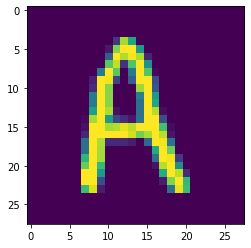

In [19]:
img_test = data[11591, 1:]
img_test = img_test.reshape(1, 784)
p = sess.run(pred, feed_dict={X:img_test})[0]
print(chr(np.argmax(p)+65))
img_test = img_test.reshape(28, 28)
plt.imshow(img_test)

In [20]:
weights['w1']

<tf.Variable 'W1:0' shape=(784, 128) dtype=float32_ref>

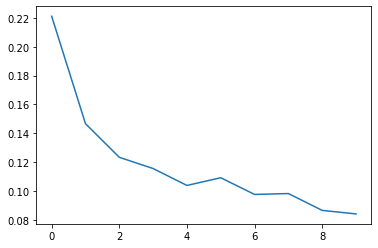

In [22]:
plt.plot(losses)

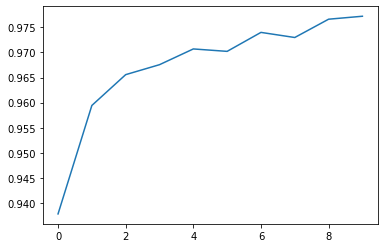

In [23]:
plt.plot(acc)